## 변수 정의

* weightA 국내 철 스크랩 가격
### 1. 철스크랩(Scrap Steel) > 해외가격(Overseas)
* priceCN: 중국 장쑤 내수가 (달러/톤)
* priceJP: 일본 내수가 (백엔/톤)
* priceUSA_TAIWAN : 미국→대만 (컨테이너) (달러/톤)
### 2. 철스크랩(Scrap Steel) > 한국의 수입가
* importPriceUSA: 미국산 대형 -벌크 (HMS No.1) (달러/톤)
* importPriceJP: 일본 H2 (백엔/톤)
### 3. 기타 변수
* stock: 국내 제강사 재고
* USD_KR: 달러 환율(해당일 매매기준율)
* JPY_KR: 엔화 환율(해당일 매매기준율)

In [53]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress = True, precision = 4)
# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format
# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns", None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14
# 난수 시드
random_seed = 123
pd.set_option('display.max_rows', 500)

In [54]:
df_p10 = pd.read_csv('./data/new_metric_p10.csv', sep=',')
df_p10['date'] = pd.to_datetime(df_p10['date'], format='%Y-%m-%d')

df_p50 = pd.read_csv('./data/new_metric_p50.csv', sep=',')
df_p50['date'] = pd.to_datetime(df_p50['date'], format='%Y-%m-%d')

df_p90 = pd.read_csv('./data/new_metric_p90.csv', sep=',') 
df_p90['date'] = pd.to_datetime(df_p90['date'], format='%Y-%m-%d')



In [55]:
#분기처리를 위한 배열
mr = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]

for m in mr:
    print(m)
def get_quarter(m):
    if m >= 1 and m <= 3:
        return 1
    elif m >= 4 and m <= 6:
        return 2
    elif m >= 7 and m <= 9:
        return 3
    elif m >= 10 and m <= 12:
        return 4
print(get_quarter(3))

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
[10, 11, 12]
1


In [56]:
df = df_p10
# 계산을 위해 YEAR-Quarter 컬럼 추가 (값 형태 year.quarter)
df['quarter'] = df['date'].dt.year+ (df.date.dt.quarter)*0.1
#부서 고유공식(1) 적용된 스크랩가 구하기
df['scrap'] = df['weightA']*0.7 + df['importPriceJP']*0.2 + df['importPriceUSA']*0.1
df_a = df.groupby(['quarter'])['gosi'].mean().reset_index()
df_b = df.groupby(['quarter'])['scrap'].mean().reset_index()
df.head()


,date,priceJP,priceUSA_TAIWAN,importPriceUSA,importPriceJP,weightA,stock,gosi,priceCN,USD_KR,quarter,scrap
0,2021-10-04,441.3359,447.7513,445.4356,421.3119,497.6562,714.9514,859.7231,568.0253,1187.5000,2021.4000,477.1653
1,2021-10-11,425.6501,429.2052,439.3720,415.3202,496.9732,743.8181,843.2329,551.1859,1196.5000,2021.4000,474.8825
2,2021-10-18,409.5516,410.2639,433.4680,412.2781,498.5783,766.8966,821.9907,533.8375,1187.5000,2021.4000,474.8073
3,2021-10-25,387.7987,386.4450,438.0644,416.4450,503.0927,803.3981,815.5361,511.4533,1175.6200,2021.4000,479.2603
4,2021-11-01,377.6693,374.2088,437.5430,418.2823,505.5228,822.1793,809.9799,497.8387,1179.4860,2021.4000,481.2767


In [64]:
df_pre = pd.read_csv('./data/res_df001.csv', sep=',')
df_pre['date'] = pd.to_datetime(df_pre['date'], format='%Y-%m-%d')

df_pre = df_pre.rename(columns = {'분기고시가': 'gosi'}, inplace = False)
df_pre = df_pre.drop(['scrap_gap', 'JPY_KR'], axis=1)
df_pre

,date,gosi,weightA,priceUSA_TAIWAN,priceJP,priceCN,importPriceUSA,importPriceJP,stock,USD_KR,quarter,scrap
0,2021-10-15,928,546.0000,473.0000,503.0000,585.0000,515.0000,535.0000,884.0000,1183.0000,2021.4000,540.7000
1,2021-10-08,928,535.0000,463.0000,473.0000,583.0000,515.0000,520.0000,914.0000,1190.5000,2021.4000,530.0000
2,2021-10-01,928,528.0000,464.0000,455.0000,582.0000,515.0000,455.0000,955.0000,1186.0000,2021.4000,512.1000
3,2021-09-24,930,527.0000,464.0000,448.0000,574.0000,475.0000,455.0000,938.0000,1174.0000,2021.3000,507.4000
4,2021-09-17,930,535.0000,455.0000,443.0000,586.0000,475.0000,455.0000,938.0000,1173.5000,2021.3000,513.0000
5,2021-09-10,930,537.0000,453.0000,445.0000,586.0000,475.0000,450.0000,870.0000,1170.0000,2021.3000,513.4000
6,2021-09-03,930,545.0000,443.0000,449.0000,574.0000,475.0000,455.0000,788.0000,1157.0000,2021.3000,520.0000
7,2021-08-27,925,551.0000,442.0000,455.0000,571.0000,513.5000,450.0000,688.0000,1170.0000,2021.3000,527.0500
8,2021-08-20,925,546.0000,441.0000,460.0000,577.0000,513.5000,450.0000,690.0000,1184.0000,2021.3000,523.5500
9,2021-08-13,925,545.0000,435.0000,461.0000,586.0000,513.5000,455.0000,705.0000,1169.0000,2021.3000,523.8500


In [66]:
df = df.append(df_pre, ignore_index=False, sort=False)
df=df.sort_values(by='date').drop_duplicates()
df

,date,priceJP,priceUSA_TAIWAN,importPriceUSA,importPriceJP,weightA,stock,gosi,priceCN,USD_KR,quarter,scrap
246,2017-01-06,254.0000,253.0000,283.0000,280.0000,295.0000,869.0000,620.0000,253.4000,1193.5000,2017.1000,290.8000
245,2017-01-13,257.0000,251.0000,279.0000,280.0000,280.0000,846.0000,620.0000,253.4000,1175.0000,2017.1000,279.9000
244,2017-01-20,256.0000,251.0000,279.0000,270.0000,270.0000,944.0000,620.0000,253.4000,1174.0000,2017.1000,270.9000
243,2017-01-27,255.0000,255.0000,279.0000,250.0000,270.0000,1019.0000,620.0000,253.4000,1162.5000,2017.1000,266.9000
242,2017-02-03,253.0000,244.0000,279.0000,245.0000,264.0000,1007.0000,620.0000,253.7000,1149.0000,2017.1000,261.7000
241,2017-02-10,248.0000,237.0000,279.0000,255.0000,256.0000,1064.0000,620.0000,253.7000,1148.0000,2017.1000,258.1000
240,2017-02-17,247.0000,245.0000,279.0000,265.0000,255.0000,1055.0000,620.0000,253.7000,1148.0000,2017.1000,259.4000
239,2017-02-24,245.0000,251.0000,279.0000,285.0000,252.0000,1141.0000,620.0000,253.7000,1131.5000,2017.1000,261.3000
238,2017-03-03,252.0000,269.0000,279.0000,290.0000,252.0000,1085.0000,620.0000,258.9000,1157.0000,2017.1000,262.3000
237,2017-03-10,264.0000,276.0000,279.0000,305.0000,263.0000,1005.0000,620.0000,258.9000,1157.5000,2017.1000,273.0000


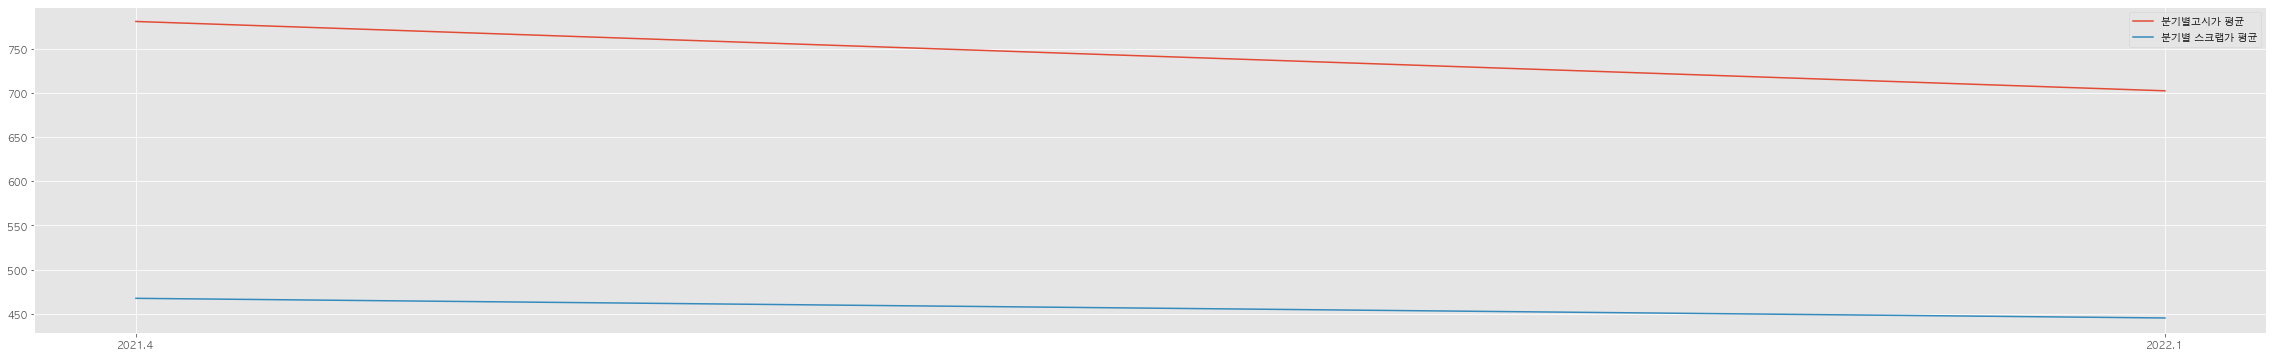

In [67]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (40,6)
xi = list(range(len(df_a)))
fig = plt.figure()
ay= fig.add_subplot(111)
ay.plot(df_a.index, df_a['gosi'], label = '분기별고시가 평균')
ay.plot(df_b.index, df_b['scrap'] , label = '분기별 스크랩가 평균')
plt.xticks(xi, df_a['quarter'])
plt.legend() 

plt.show()

fig.savefig('./result_img/fig1.png', dpi = 100)
#fig.close()

In [68]:

def get_sgap(row):
    month = row.month #current month
    year = row.year
    if month % 3 == 0 : # 3, 6, 9, 12
        # *9월 = (7, 8월의 스크랩평균가)의 평균가가 전분기 대비 5% +- 상관없이 변동되었을 때.
        #(같은 분기 7월) 고시가 + [(7, 8월의 스크랩평균가) - (전분기, 2분기 스크랩평균가)]
        df_year = df[df['date'].dt.year == year]
        mean1 = df_year[df_year['date'].dt.month == month - 1].scrap.mean()
        mean2 = df_year[df_year['date'].dt.month == month - 2].scrap.mean()
        scrap_mean = (mean1 + mean2) / 2
        same_quarter_price = df[df.quarter == year+0.1*row.quarter][-1:]['gosi'].values[0]
        q1 = get_quarter(month) - 1
        if q1 == 0:
            year = year - 1
            q1 = 4
        try:
            previous_q1_mean_scrap = df_b[df_b.quarter == year + q1 * 0.1]['scrap'].values[0]
                       
            return same_quarter_price+ (scrap_mean - previous_q1_mean_scrap)
        except IndexError:
            return -1

    elif month % 3 == 1 : # 1 4 7 10
        # 7월 =전분기의 고시가인 4월 고시가 + [ 4,5,6(2분기) 스크랩 평균가  - 1분기 스크랩평균가 ]
        q1 = get_quarter(month) - 1
        previous_q1_mean_scrap = 0
        previous_q2_mean_scrap = 0
        previous_quarter_price = 0
        try:  
            previous_quarter_price  = df[df.quarter == year+0.1*(row.quarter-1)][-1:]['gosi'].values[0]
        except IndexError:
            previous_quarter_price = df[df.quarter == year+0.1*row.quarter][-1:]['gosi'].values[0]
        try:  
            if q1 == 0:
                year = year - 1
                q2 = 4
                q1 = 3
                previous_q1_mean_scrap = df_b[df_b.quarter == (year+q1*0.1)]['scrap']
            elif q1 == 1: # 4 month, 
                print(month)
                previous_q1_mean_scrap = df_b[df_b.quarter == (year+q1*0.1)]['scrap']  
                year = year -1
                q2 = 4
            else:
                previous_q1_mean_scrap = df_b[df_b.quarter == (year+q1*0.1)]['scrap'] 
                q2 = q1 - 1
            previous_q2_mean_scrap = df_b[df_b.quarter == (year+q2*0.1)]['scrap']
            print("%d-%d ( %d %d )"%(year, month, q1, q2))
            a = previous_q1_mean_scrap.values[0]
            b = previous_q2_mean_scrap.values[0]
            if len(previous_q1_mean_scrap) > 0 and len(previous_q2_mean_scrap) > 0 :
                return previous_quarter_price + (a - b)
            else: return -1
        except TypeError:  
            return -2
        except Exception:
            return -3
    else : # 2 5 8 11
        # *8월 = 7월의 스크랩평균가가 전분기 대비 5% 변동되었을 경우,
        #(같은 분기의 7월) 고시가 + [( 7월 스크랩 평균가 ) -(전분기, 2분기 스크랩평균가) ]
        df_year = df[df['date'].dt.year == year]
        mean1 =  df_year[df_year['date'].dt.month == month-1 ].scrap.mean()
        same_quarter_price = df[df.quarter == year+0.1*row.quarter][-1:]['gosi'].values[0]
        q1 = get_quarter(month)-1        
        if q1 == 0:
            year = year-1
            q1 = 4
        previous_q1_mean_scrap = df_b[df_b.quarter == (year+q1*0.1)]['scrap']
        if len( previous_q1_mean_scrap.values) > 0:
            return same_quarter_price + (mean1 - previous_q1_mean_scrap.values)[0]
        else:
            return 0
df['scrap_gap'] = df['date'].apply(get_sgap)

2016-1 ( 3 4 )
2016-1 ( 3 4 )
2016-1 ( 3 4 )
2016-1 ( 3 4 )
4
2016-4 ( 1 4 )
4
2016-4 ( 1 4 )
4
2016-4 ( 1 4 )
4
2016-4 ( 1 4 )
2017-7 ( 2 1 )
2017-7 ( 2 1 )
2017-7 ( 2 1 )
2017-7 ( 2 1 )
2017-10 ( 3 2 )
2017-10 ( 3 2 )
2017-10 ( 3 2 )
2017-1 ( 3 4 )
2017-1 ( 3 4 )
2017-1 ( 3 4 )
2017-1 ( 3 4 )
4
2017-4 ( 1 4 )
4
2017-4 ( 1 4 )
4
2017-4 ( 1 4 )
4
2017-4 ( 1 4 )
2018-7 ( 2 1 )
2018-7 ( 2 1 )
2018-7 ( 2 1 )
2018-7 ( 2 1 )
2018-10 ( 3 2 )
2018-10 ( 3 2 )
2018-10 ( 3 2 )
2018-10 ( 3 2 )
2018-1 ( 3 4 )
2018-1 ( 3 4 )
2018-1 ( 3 4 )
2018-1 ( 3 4 )
4
2018-4 ( 1 4 )
4
2018-4 ( 1 4 )
4
2018-4 ( 1 4 )
4
2018-4 ( 1 4 )
2019-7 ( 2 1 )
2019-7 ( 2 1 )
2019-7 ( 2 1 )
2019-7 ( 2 1 )
2019-10 ( 3 2 )
2019-10 ( 3 2 )
2019-10 ( 3 2 )
2019-10 ( 3 2 )
2019-1 ( 3 4 )
2019-1 ( 3 4 )
2019-1 ( 3 4 )
2019-1 ( 3 4 )
2019-1 ( 3 4 )
4
2019-4 ( 1 4 )
4
2019-4 ( 1 4 )
4
2019-4 ( 1 4 )
4
2019-4 ( 1 4 )
2020-7 ( 2 1 )
2020-7 ( 2 1 )
2020-7 ( 2 1 )
2020-7 ( 2 1 )
2020-7 ( 2 1 )
2020-10 ( 3 2 )
2020-10 ( 3 2 )
2020-10 ( 

In [69]:
df

,date,priceJP,priceUSA_TAIWAN,importPriceUSA,importPriceJP,weightA,stock,gosi,priceCN,USD_KR,quarter,scrap,scrap_gap
246,2017-01-06,254.0000,253.0000,283.0000,280.0000,295.0000,869.0000,620.0000,253.4000,1193.5000,2017.1000,290.8000,-3
245,2017-01-13,257.0000,251.0000,279.0000,280.0000,280.0000,846.0000,620.0000,253.4000,1175.0000,2017.1000,279.9000,-3
244,2017-01-20,256.0000,251.0000,279.0000,270.0000,270.0000,944.0000,620.0000,253.4000,1174.0000,2017.1000,270.9000,-3
243,2017-01-27,255.0000,255.0000,279.0000,250.0000,270.0000,1019.0000,620.0000,253.4000,1162.5000,2017.1000,266.9000,-3
242,2017-02-03,253.0000,244.0000,279.0000,245.0000,264.0000,1007.0000,620.0000,253.7000,1149.0000,2017.1000,261.7000,0
241,2017-02-10,248.0000,237.0000,279.0000,255.0000,256.0000,1064.0000,620.0000,253.7000,1148.0000,2017.1000,258.1000,0
240,2017-02-17,247.0000,245.0000,279.0000,265.0000,255.0000,1055.0000,620.0000,253.7000,1148.0000,2017.1000,259.4000,0
239,2017-02-24,245.0000,251.0000,279.0000,285.0000,252.0000,1141.0000,620.0000,253.7000,1131.5000,2017.1000,261.3000,0
238,2017-03-03,252.0000,269.0000,279.0000,290.0000,252.0000,1085.0000,620.0000,258.9000,1157.0000,2017.1000,262.3000,-1
237,2017-03-10,264.0000,276.0000,279.0000,305.0000,263.0000,1005.0000,620.0000,258.9000,1157.5000,2017.1000,273.0000,-1


In [83]:
#Feature scaling
#ScikitLearn의 MinxMax Scaler를 이용한 정규화(Normalization)
#min,max = 0~1
from sklearn.preprocessing import MinMaxScaler
def min_max_scaler(df_input):
    scaler = MinMaxScaler()
    df_scaled= df_input.iloc[:, 1:] # col date remove
    scaler.fit(df_scaled)
    df_scaled = scaler.transform(df_scaled)
    df_input.iloc[:, 1:] = df_scaled[:, :]
    return df_input

df_p10 = min_max_scaler(df_p10)
df_p50 = min_max_scaler(df_p50)
df_p90 = min_max_scaler(df_p90)

In [84]:
df = pd.read_csv('./data/df_mid.csv', sep=',')
df.head()

,date,분기고시가,weightA,priceUSA_TAIWAN,priceJP,priceCN,importPriceUSA,importPriceJP,stock,USD_KR,JPY_KR,quarter,scrap,scrap_gap
0,2021-10-15,928,546.0000,473.0000,503.0000,585.0000,515.0000,535.0000,884.0000,1183.0000,1035.0400,2021.4000,540.7000,923.2923
1,2021-10-08,928,535.0000,463.0000,473.0000,583.0000,515.0000,520.0000,914.0000,1190.5000,1068.5800,2021.4000,530.0000,923.2923
2,2021-10-01,928,528.0000,464.0000,455.0000,582.0000,515.0000,455.0000,955.0000,1186.0000,1058.6000,2021.4000,512.1000,923.2923
3,2021-09-24,930,527.0000,464.0000,448.0000,574.0000,475.0000,455.0000,938.0000,1174.0000,1068.4900,2021.3000,507.4000,925.9013
4,2021-09-17,930,535.0000,455.0000,443.0000,586.0000,475.0000,455.0000,938.0000,1173.5000,1072.8200,2021.3000,513.0000,925.9013


In [85]:
#Feature scaling
#ScikitLearn의 MinxMax Scaler를 이용한 정규화(Normalization)
#min,max = 0~1

df_s = df.loc[:, [col for col in df.columns if col != "scrap_gap"]]
#df_s = df#df[df['scrap_gap']>100]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled= df_s.iloc[:, 1:] # col date remove
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df_s.iloc[:, 1:] = df_scaled[:, :]

In [86]:
predict_data = df_s
from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()
#X = predict_data[["weightA", "priceUSA_TAIWAN","priceJP","priceCN","importPriceUSA","importPriceJP" ,"stock", "USD_KR"]]
X=predict_data[["priceJP","priceUSA_TAIWAN","importPriceUSA","importPriceJP","weightA","stock","priceCN","USD_KR"]]
X.tail()

,priceJP,priceUSA_TAIWAN,importPriceUSA,importPriceJP,weightA,stock,priceCN,USD_KR
225,0.1621,0.1600,0.1224,0.1571,0.0370,0.8913,0.0000,0.3436
226,0.1621,0.1455,0.1224,0.1571,0.0370,0.9715,0.0000,0.3380
227,0.1560,0.1455,0.1224,0.1857,0.0586,0.9430,0.0479,0.3156
228,0.1621,0.1455,0.1224,0.1571,0.0710,0.9465,0.0479,0.3380
229,0.1651,0.1236,0.1224,0.1571,0.0833,0.9554,0.0479,0.3631


In [102]:
#모델에 기여하는 변수를 확인

y =  df["분기고시가"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

coef = pd.DataFrame({"feature_names":X.columns, "coefficient":model.coef_})
#coef['coeffiecient_abs'] =coef['coefficient'].abs()
res_coef1 = coef.sort_values(by ='coefficient', ascending=False)

res_coef1.to_csv("coef_gosi.csv",index=False)
res_coef1

0.8925816677235479
0.8676187079916936


,feature_names,coefficient
4,weightA,255.1696
0,priceJP,179.4698
6,priceCN,91.8765
5,stock,41.9795
7,USD_KR,27.9253
1,priceUSA_TAIWAN,-28.0689
2,importPriceUSA,-60.6045
3,importPriceJP,-144.9854


In [103]:
y

0      928
1      928
2      928
3      930
4      930
5      930
6      930
7      925
8      925
9      925
10     925
11     862
12     862
13     862
14     862
15     862
16     845
17     845
18     845
19     845
20     803
21     803
22     803
23     803
24     803
25     803
26     803
27     803
28     803
29     715
30     715
31     715
32     715
33     715
34     715
35     715
36     715
37     715
38     715
39     715
40     715
41     715
42     685
43     685
44     685
45     685
46     685
47     685
48     685
49     685
50     685
51     685
52     685
53     685
54     685
55     660
56     660
57     660
58     660
59     660
60     660
61     660
62     660
63     660
64     660
65     660
66     660
67     660
68     663
69     663
70     663
71     663
72     663
73     663
74     663
75     663
76     663
77     663
78     663
79     663
80     663
81     660
82     660
83     660
84     660
85     660
86     660
87     660
88     660
89     660
90     660

In [104]:
df_p10.head()


,priceJP,priceUSA_TAIWAN,importPriceUSA,importpriceJP,weightA,stock,priceCN,USD_KR
0,1.0000,1.0000,1.0000,1.0000,0.8523,0.2813,1.0000,0.1213
1,0.8965,0.8863,0.9231,0.8967,0.8395,0.4114,0.9257,0.2132
2,0.7904,0.7703,0.8482,0.8443,0.8696,0.5153,0.8491,0.1213
3,0.6469,0.6243,0.9065,0.9161,0.9544,0.6798,0.7502,0.0000
4,0.5801,0.5493,0.8999,0.9478,1.0000,0.7644,0.6901,0.0395


In [60]:
df_p10 = df_p10.drop(['date','gosi'], axis=1)
df_p50 = df_p50.drop(['date','gosi'], axis=1)
df_p90 = df_p90.drop(['date','gosi'], axis=1)
df_p10.head()

,priceJP,priceUSA_TAIWAN,importPriceUSA,importPriceJP,weightA,stock,priceCN,USD_KR,quarter,scrap
0,441.3359,447.7513,445.4356,421.3119,497.6562,714.9514,568.0253,1187.5000,2021.4000,477.1653
1,425.6501,429.2052,439.3720,415.3202,496.9732,743.8181,551.1859,1196.5000,2021.4000,474.8825
2,409.5516,410.2639,433.4680,412.2781,498.5783,766.8966,533.8375,1187.5000,2021.4000,474.8073
3,387.7987,386.4450,438.0644,416.4450,503.0927,803.3981,511.4533,1175.6200,2021.4000,479.2603
4,377.6693,374.2088,437.5430,418.2823,505.5228,822.1793,497.8387,1179.4860,2021.4000,481.2767


In [61]:
x_pred_p10 = df_p10.values.tolist()
x_pred_p50 = df_p50.values.tolist()
x_pred_p90 = df_p90.values.tolist()

x_pred_p10

[[441.335907,
  447.7512512,
  445.4356079,
  421.3119202,
  497.6562195,
  714.951355,
  568.0253296,
  1187.5,
  2021.4,
  477.16529848000005],
 [425.6501465,
  429.2052002,
  439.3720093,
  415.3202209,
  496.9732361,
  743.8181152,
  551.1858521,
  1196.5,
  2021.4,
  474.88251038],
 [409.5515747,
  410.263916,
  433.4680176,
  412.2781067,
  498.5783386,
  766.8966064,
  533.8374634,
  1187.5,
  2021.4,
  474.80726011999997],
 [387.7987366,
  386.4449768,
  438.0644226,
  416.4449768,
  503.0926514,
  803.3981323,
  511.4533386,
  1175.62,
  2021.4,
  479.26029359999995],
 [377.6693115,
  374.2088318,
  437.5429993,
  418.2823486,
  505.5227661,
  822.1792603,
  497.8386536,
  1179.486,
  2021.4,
  481.27670592],
 [369.0490723,
  364.3146057,
  434.1230774,
  414.5742798,
  497.7399292,
  824.7085571,
  484.6297607,
  1180.964,
  2021.4,
  474.74511414],
 [362.8417664,
  357.0911865,
  429.3916321,
  409.375,
  491.0584717,
  817.5400391,
  471.9641724,
  1206.948,
  2021.4,
  468

In [62]:
a=pd.DataFrame()
a['p50']=model.predict(x_pred_p50)

NameError: name 'model' is not defined

In [63]:
a['p90']=model.predict(x_pred_p90)

NameError: name 'model' is not defined

In [116]:
a['p10']=model.predict(x_pred_p10)

,p50,p90,p10
0,812.2773,740.8247,852.6407
1,828.8904,775.8995,854.8181
2,846.2871,817.1079,853.6080
3,846.2148,862.1864,834.0706
4,850.1978,852.1015,830.7672
5,831.1018,858.9785,792.4213
6,816.9982,862.4918,771.8569
7,793.9309,857.5510,781.0229
8,737.5237,817.3495,703.0586
9,735.3221,843.0581,652.0166


In [99]:
x1 = [0.9, 0.92, 0.94, 0.9, 0.94,0.92, 0.94, 0.9 ]
x2 = [0.7, 0.6, 0.6,0.92, 0.94, 0.9, 0.9, 0.94  ]
x_pred = [x1, x2]
model.predict(x_pred)

array([0.9628, 0.9938])